In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA

# Dataset

In [2]:
df = pd.read_csv('./database/csv_files/heart.csv')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
df.shape

(918, 12)

In [4]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# null values
df.isnull().sum().sum()

0

In [7]:
# catagorical variable summery

cat_cols = df.select_dtypes(include=['O']).columns
for i in cat_cols:
    print(df[i].value_counts())
    print('-----------------------')

M    725
F    193
Name: Sex, dtype: int64
-----------------------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
-----------------------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
-----------------------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
-----------------------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
-----------------------


# One Hot Encoding

In [8]:
ohe = OneHotEncoder(drop='first', sparse=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df[cat_cols]))
ohe_df.head()

0    1    2    3    4    5    6    7    8
0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
1  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0
3  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0
4  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0

In [9]:
scale_cols = []
for i in ohe.categories_:
    k = 0;
    for j in i:
        if k == 0:
            k = k+1;
            continue;
        else:
            scale_cols.append(j)

scale_cols

['M', 'ATA', 'NAP', 'TA', 'Normal', 'ST', 'Y', 'Flat', 'Up']

In [10]:
scale_col_map = {}

for i,j in zip(ohe_df.columns,scale_cols):
    scale_col_map[i] = j
scale_col_map

{0: 'M',
 1: 'ATA',
 2: 'NAP',
 3: 'TA',
 4: 'Normal',
 5: 'ST',
 6: 'Y',
 7: 'Flat',
 8: 'Up'}

In [11]:
ohe_df = ohe_df.rename(scale_col_map, axis=1)
df2 = df.drop(cat_cols,axis = 1).join(ohe_df)
df2.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease    M  \
0   40        140          289          0    172      0.0             0  1.0   
1   49        160          180          0    156      1.0             1  0.0   
2   37        130          283          0     98      0.0             0  1.0   
3   48        138          214          0    108      1.5             1  0.0   
4   54        150          195          0    122      0.0             0  1.0   

   ATA  NAP   TA  Normal   ST    Y  Flat   Up  
0  1.0  0.0  0.0     1.0  0.0  0.0   0.0  1.0  
1  0.0  1.0  0.0     1.0  0.0  0.0   1.0  0.0  
2  1.0  0.0  0.0     0.0  1.0  0.0   0.0  1.0  
3  0.0  0.0  0.0     1.0  0.0  1.0   1.0  0.0  
4  0.0  1.0  0.0     1.0  0.0  0.0   0.0  1.0

# Normalization

In [12]:
X = df2.drop('HeartDisease', axis = 1)
Y = df2.HeartDisease

In [13]:
scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
df3.head()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak    M  ATA  \
0  0.244898       0.70     0.479270        0.0  0.788732  0.295455  1.0  1.0   
1  0.428571       0.80     0.298507        0.0  0.676056  0.409091  0.0  0.0   
2  0.183673       0.65     0.469320        0.0  0.267606  0.295455  1.0  1.0   
3  0.408163       0.69     0.354892        0.0  0.338028  0.465909  0.0  0.0   
4  0.530612       0.75     0.323383        0.0  0.436620  0.295455  1.0  0.0   

   NAP   TA  Normal   ST    Y  Flat   Up  
0  0.0  0.0     1.0  0.0  0.0   0.0  1.0  
1  1.0  0.0     1.0  0.0  0.0   1.0  0.0  
2  0.0  0.0     0.0  1.0  0.0   0.0  1.0  
3  0.0  0.0     1.0  0.0  1.0   1.0  0.0  
4  1.0  0.0     1.0  0.0  0.0   0.0  1.0

# Logistic Regression Without PCA

In [14]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(df3,Y,train_size=0.8,random_state=66 )

In [15]:
model_01 = LogisticRegression()
model_01.fit(x_train, y_train)
model_01.score(x_test,y_test)

0.8532608695652174

# PCA with scaling

In [26]:
pca = PCA(0.99)
components = pca.fit_transform(df3)

In [27]:
pca.n_components_

13

In [28]:
df4 = pd.DataFrame(components, columns= ['PC'+str(i+1) for i in range(components.shape[1])])
df4.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.109151 -0.314354 -0.530348  0.021660  0.128299 -0.351656  0.321851   
1 -0.123444 -0.594580  1.025996  0.755160  0.055861  0.263438  0.160459   
2  0.824231  1.020241 -0.574473  0.224556  0.061310 -0.479336  0.456471   
3 -0.653189 -0.630539 -0.147153  0.573197 -0.268268  0.685731 -0.106281   
4  0.860550 -0.262399  0.686694 -0.404696 -0.358443 -0.226951  0.106872   

        PC8       PC9      PC10      PC11      PC12      PC13  
0  0.117294  0.131834 -0.125173  0.064457  0.068123 -0.018889  
1 -0.169360  0.033227 -0.014367  0.078458 -0.054097 -0.077152  
2 -0.190451  0.028000 -0.060612 -0.020731  0.020322  0.434790  
3 -0.211699 -0.039016 -0.079307 -0.029656 -0.081014  0.137531  
4 -0.095279 -0.076733  0.130170 -0.121931  0.053272  0.108243

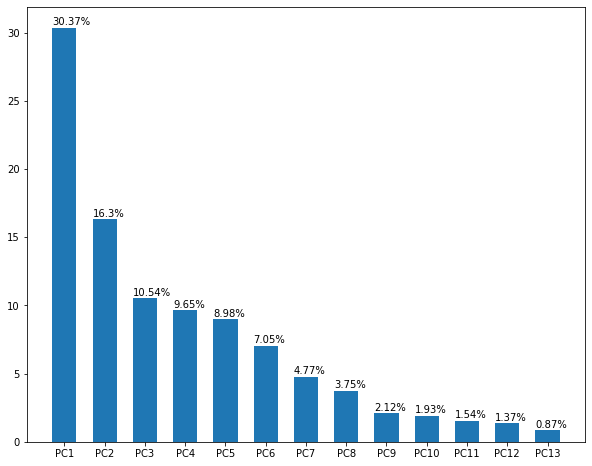

In [36]:
# percentage of variance recorded by each individual PCs

plt.figure(figsize=(10,8))

graph = plt.bar(df4.columns,pca.explained_variance_ratio_*100, width=0.6)

for g in graph:
    height = g.get_height()
    x,y = g.get_xy()
    plt.text(x,height+0.2,str(math.ceil(height*100)/100)+'%')

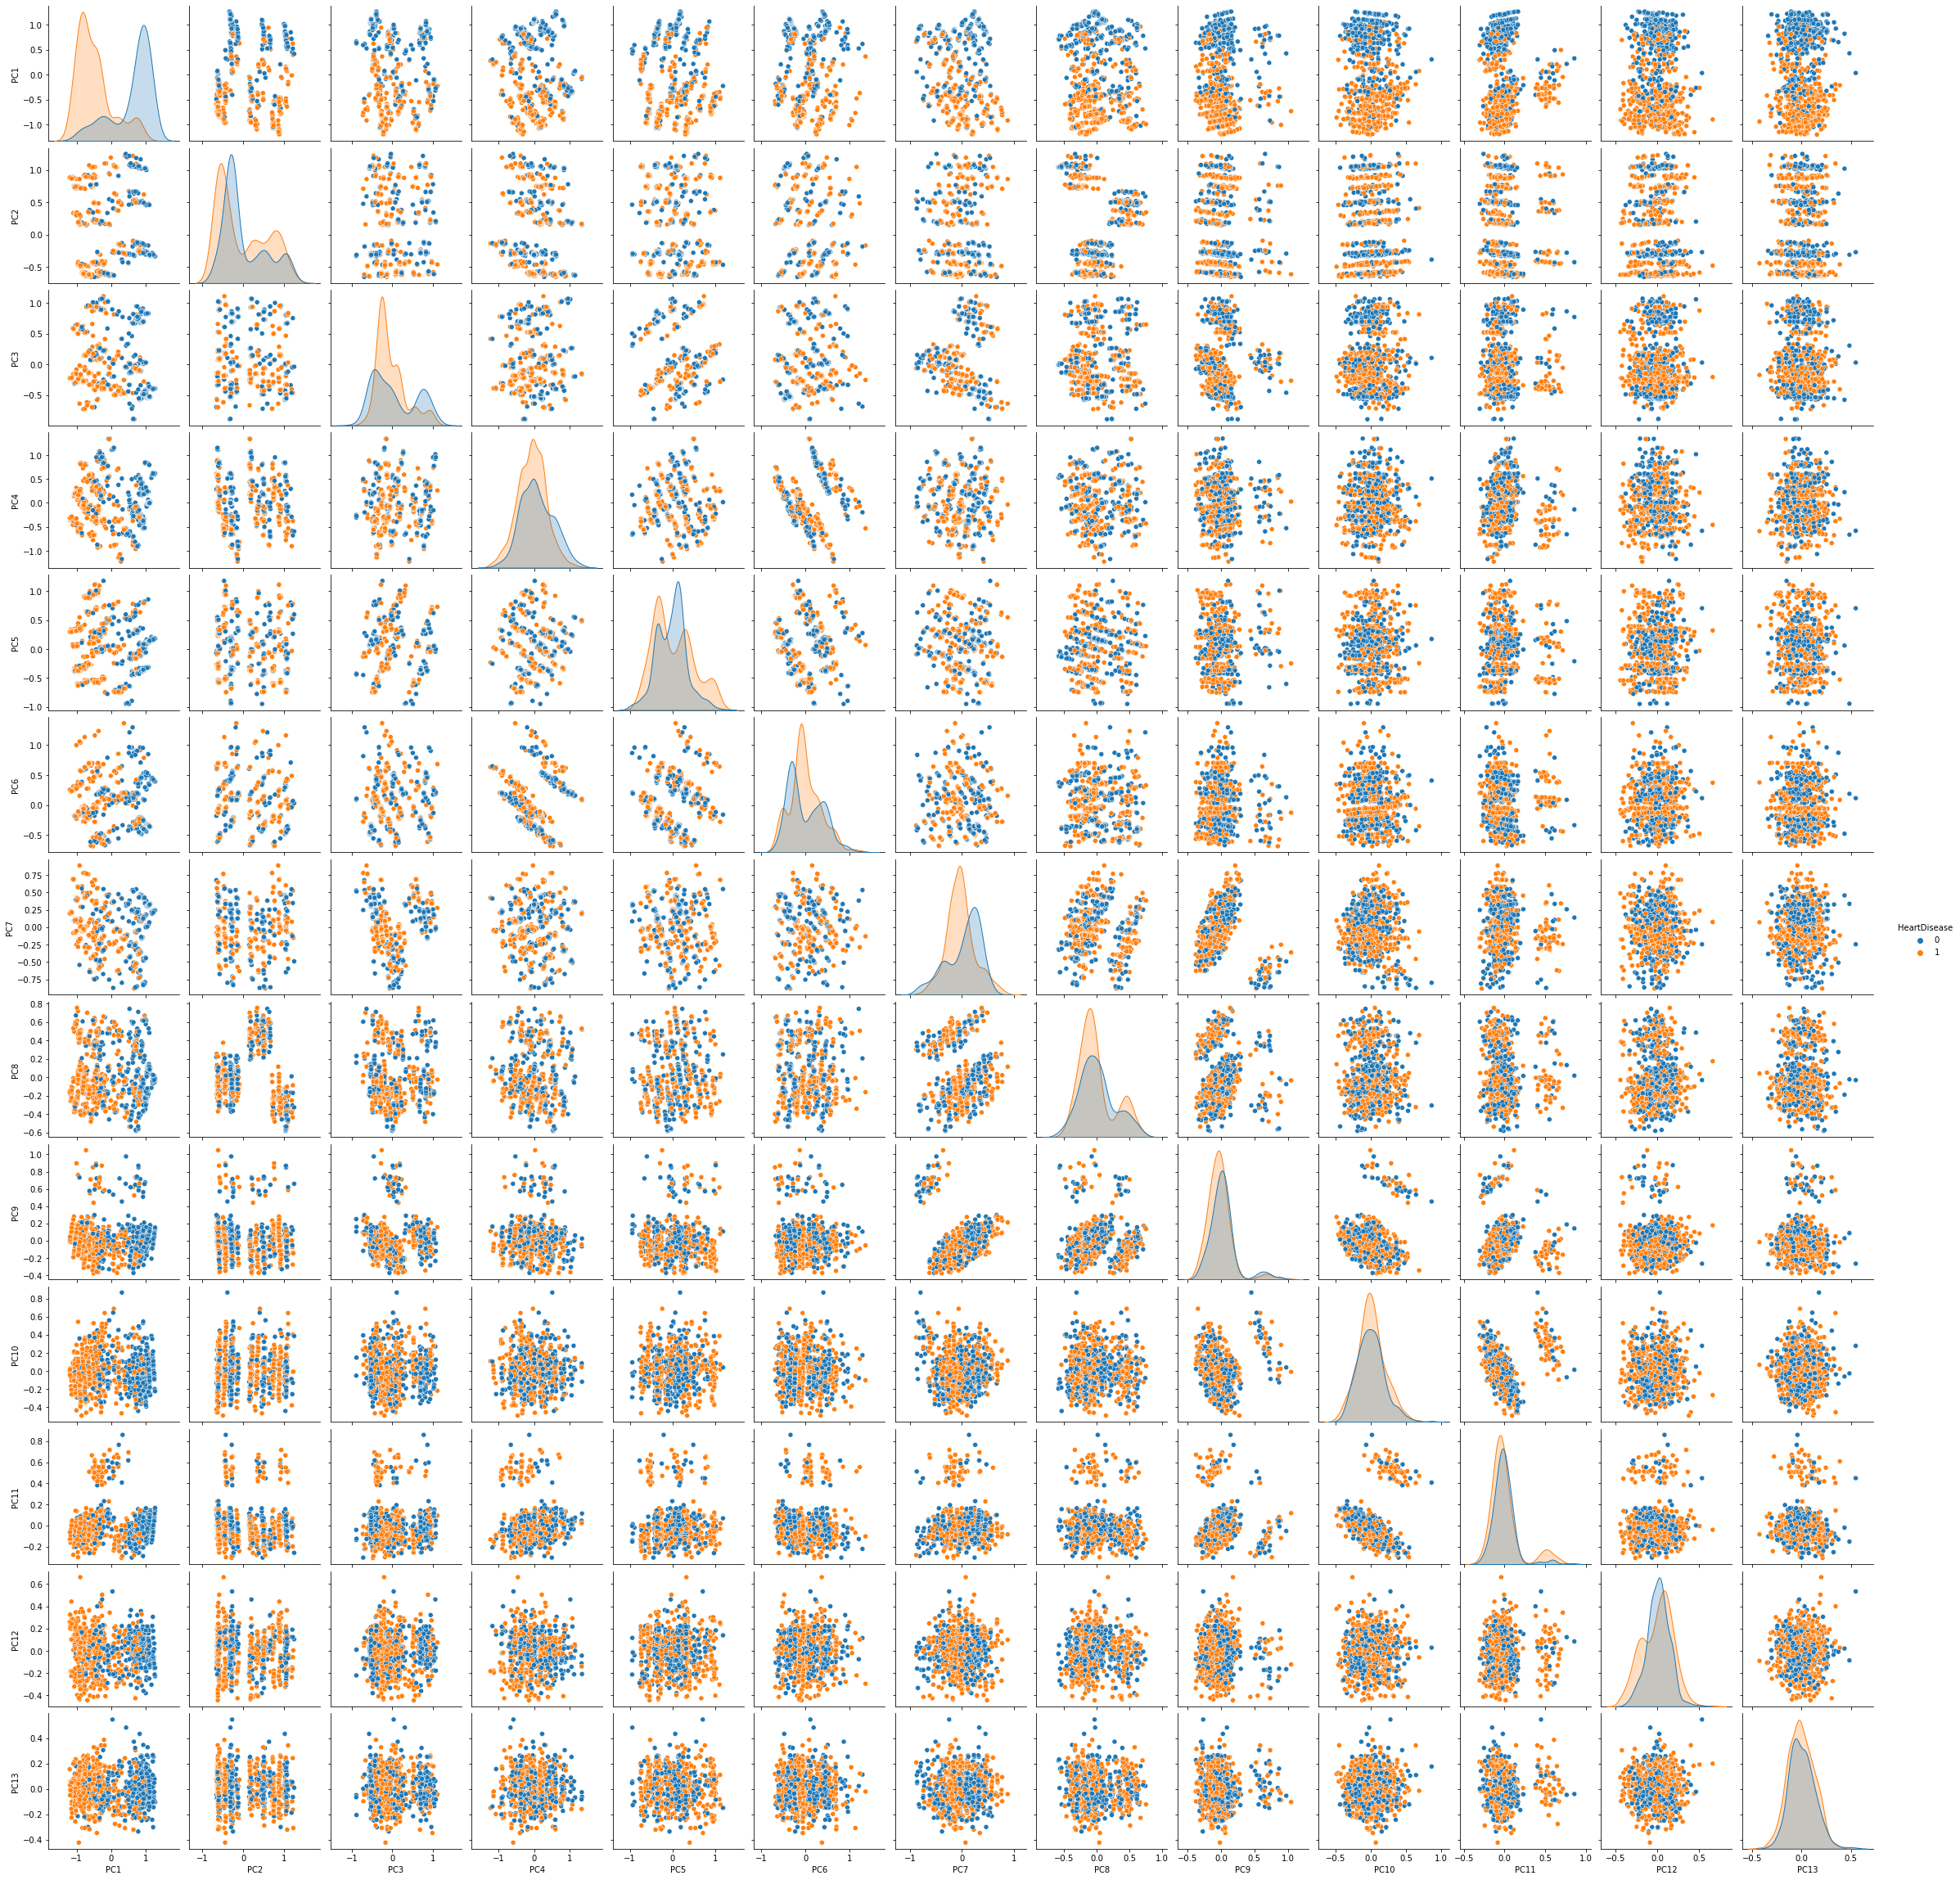

In [33]:
# visualization
df5 = df4.copy()
df5['HeartDisease'] = Y
sns.pairplot(df5,hue='HeartDisease')

In [31]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(df4,Y,train_size=0.8,random_state=66 )

In [32]:
model_02 = LogisticRegression()
model_02.fit(x_train, y_train)
model_02.score(x_test,y_test)

0.8532608695652174

# PCA without scaling

In [37]:
pca = PCA(0.99)
components = pca.fit_transform(X)

In [38]:
pca.n_components_

3

In [39]:
df4 = pd.DataFrame(components, columns= ['PC'+str(i+1) for i in range(components.shape[1])])
df4.head()

PC1        PC2        PC3
0  92.311315 -29.445651 -12.023584
1 -17.143665 -13.736029 -31.481309
2  81.906717  38.223511  16.066019
3  13.654574  28.745909   2.732691
4  -4.348523  18.094899 -13.440933

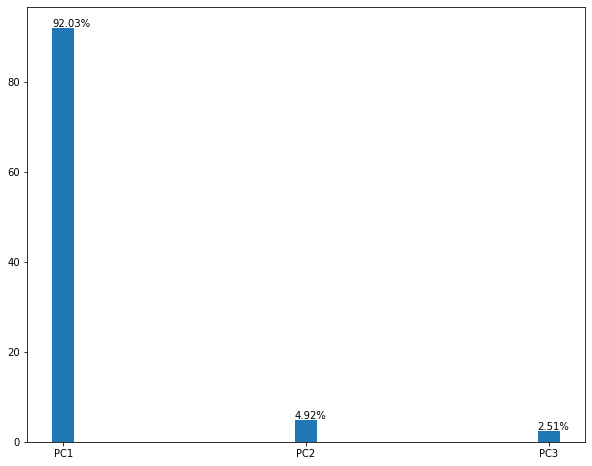

In [42]:
# percentage of variance recorded by each individual PCs

plt.figure(figsize=(10,8))

graph = plt.bar(df4.columns,pca.explained_variance_ratio_*100, width=0.09)

for g in graph:
    height = g.get_height()
    x,y = g.get_xy()
    plt.text(x,height+0.2,str(math.ceil(height*100)/100)+'%')

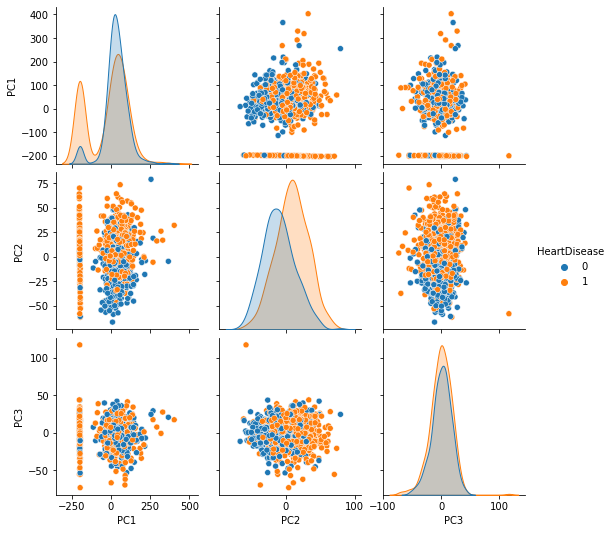

In [43]:
# visualization
df5 = df4.copy()
df5['HeartDisease'] = Y
sns.pairplot(df5,hue='HeartDisease')

In [44]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(df4,Y,train_size=0.8,random_state=66 )

In [45]:
model_02 = LogisticRegression()
model_02.fit(x_train, y_train)
model_02.score(x_test,y_test)

0.6956521739130435